<a href="https://colab.research.google.com/github/RajeswariVelakaturi/CODSOFT/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import seaborn as sns

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
# Create a DataFrame for better visualization
df = pd.DataFrame(X, columns=feature_names)
df['species'] = pd.Categorical.from_codes(y, target_names)

In [ ]:
# Display the first few rows of the dataset
print(df.head(7))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
5  setosa  
6  setosa  


In [ ]:
# Display the first few rows of the dataset
print(df.head(1000))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


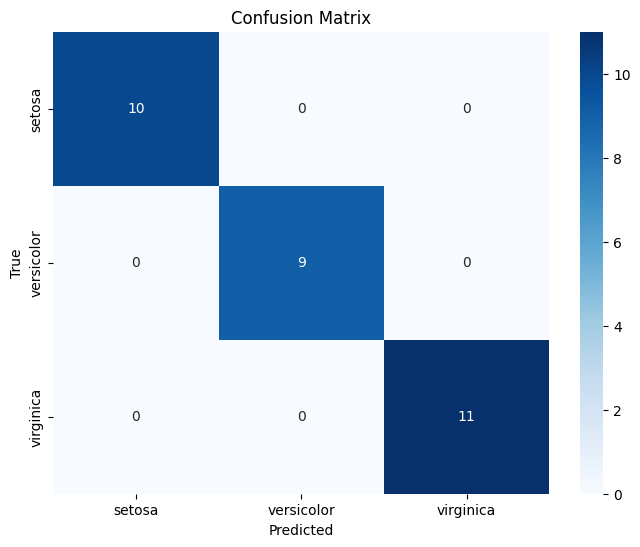

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calculate correct and incorrect predictions per class
conf_matrix = confusion_matrix(y_test, y_pred)
correct_predictions = np.diag(conf_matrix)
total_predictions = np.sum(conf_matrix, axis=1)
incorrect_predictions = total_predictions - correct_predictions


In [ ]:
# Calculate the percentage of correct and incorrect predictions
correct_percentage = np.sum(correct_predictions) / np.sum(total_predictions) * 100
incorrect_percentage = 100 - correct_percentage


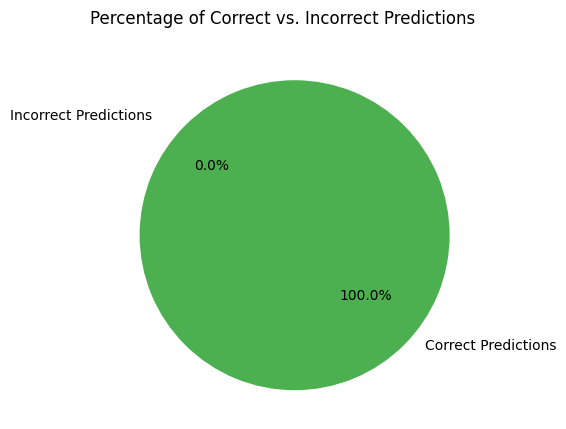

In [ ]:
plt.figure(figsize=(5, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Correct vs. Incorrect Predictions')
plt.show()

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)

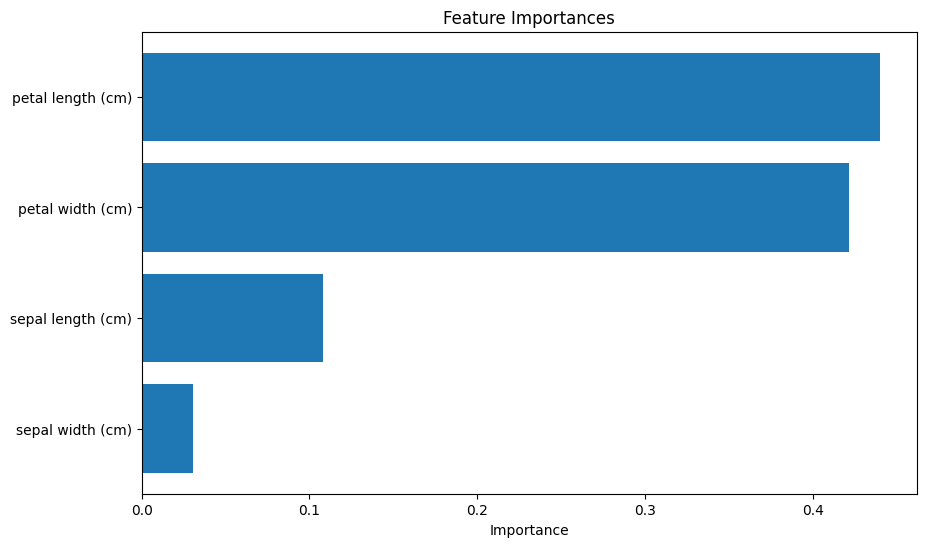

In [ ]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()

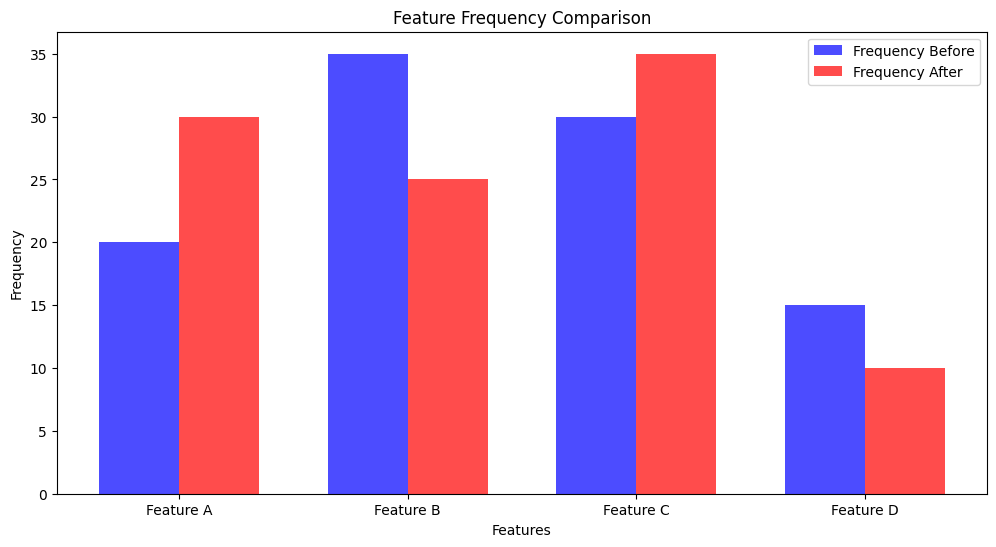

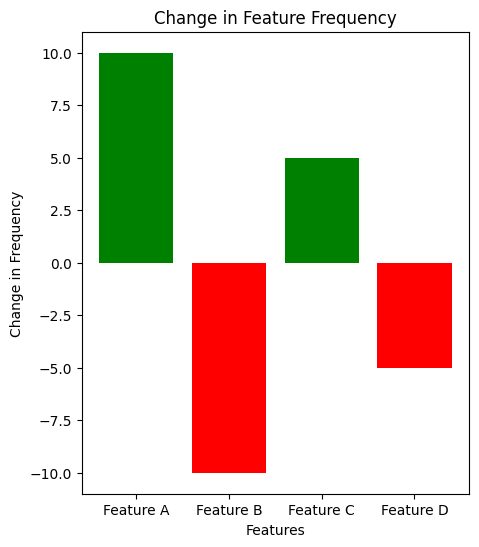

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data
features = ['Feature A', 'Feature B', 'Feature C', 'Feature D']
frequency_before = [20, 35, 30, 15]  # Frequencies before some changes
frequency_after = [30, 25, 35, 10]   # Frequencies after changes

# Calculate changes
changes = np.array(frequency_after) - np.array(frequency_before)

# Create a DataFrame for better visualization
df = pd.DataFrame({
    'Feature': features,
    'Frequency Before': frequency_before,
    'Frequency After': frequency_after,
    'Change': changes
})

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(features))

# Bars for frequency before and after
plt.bar(index, df['Frequency Before'], bar_width, label='Frequency Before', color='b', alpha=0.7)
plt.bar(index + bar_width, df['Frequency After'], bar_width, label='Frequency After', color='r', alpha=0.7)

# Add labels
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Feature Frequency Comparison')
plt.xticks(index + bar_width / 2, df['Feature'])
plt.legend()
plt.show()

# Bar chart for changes
plt.figure(figsize=(5, 6))
plt.bar(df['Feature'], df['Change'], color=np.where(df['Change'] >= 0, 'g', 'r'))
plt.xlabel('Features')
plt.ylabel('Change in Frequency')
plt.title('Change in Feature Frequency')
plt.show()


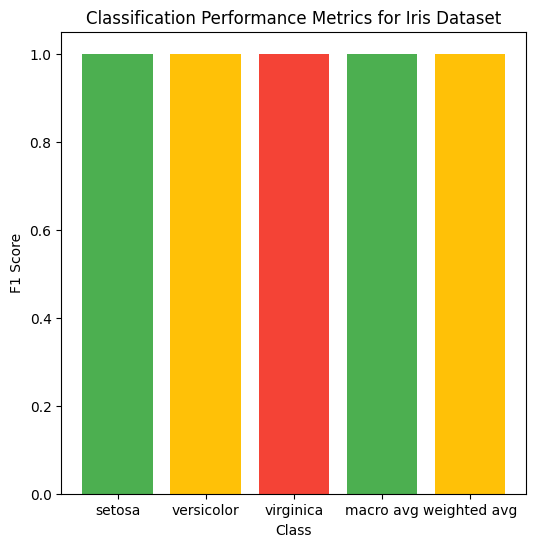

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Classification Report
report = classification_report(y_test, y_pred, target_names=target_names, output_dict=True)

# Extract data for plotting
metrics = list(report.keys())
class_metrics = {metric: report[metric]['f1-score'] for metric in metrics if metric != 'accuracy'}

# Plot classification percentages
plt.figure(figsize=(6, 6))
plt.bar(class_metrics.keys(), class_metrics.values(), color=['#4CAF50', '#FFC107', '#F44336'])
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('Classification Performance Metrics for Iris Dataset')
plt.show()


In [ ]:
# Pie chart for correct vs. incorrect predictions
labels = ['Correct Predictions', 'Incorrect Predictions']
sizes = [correct_percentage, incorrect_percentage]
colors = ['#4CAF50', '#F44336']
explode = (0.1, 0)  # explode the 1st slice (Correct Predictions)


In [ ]:
# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
